# Orbit Integrations (and more)
Jack Hong

In [115]:
from __future__ import division
from galpy.orbit import Orbit
from galpy.potential import SpiralArmsPotential, MWPotential2014
import numpy as np
import matplotlib.pyplot as plt

In [254]:
from galpy.potential import evaluateDensities

def rel_den_perturbation(amp, Rs=0.5, H=0.5, r_ref=1):
    sp = SpiralArmsPotential(amp=amp, Rs=Rs, H=H, r_ref=r_ref)
    mp = MWPotential2014
    R = 1
    nzs = 50
    nphis = 50
    zs = np.linspace(-1, 1, nzs)
    phis = np.linspace(0, np.pi, nphis)
    r = np.zeros(nzs)
    counter = 0
    for jj in range(nzs):
        sp_dens = np.zeros(nphis)
        for kk in range(nphis):       
            sp_dens[kk] = evaluateDensities(sp, R, zs[jj], phis[kk])

        mp_dens = evaluateDensities(mp, R, zs[jj])
        r[counter] = max(sp_dens) / mp_dens
        counter = counter + 1
            
    avg = np.mean(r)
    stddev = np.std(r)
    return avg, stddev, r

rel_den_perturbation(.5)

(0.19327859835704542,
 0.12445114092237353,
 array([ 0.02580801,  0.03222844,  0.03992172,  0.04904449,  0.05983068,
         0.07249978,  0.08705621,  0.10357507,  0.12208057,  0.14253389,
         0.16486552,  0.18911452,  0.21475549,  0.24139281,  0.26852139,
         0.29551407,  0.32159293,  0.3457582 ,  0.3666089 ,  0.38187715,
         0.38716592,  0.37245806,  0.314196  ,  0.18183295,  0.05173222,
         0.05173222,  0.18183295,  0.314196  ,  0.37245806,  0.38716592,
         0.38187715,  0.3666089 ,  0.3457582 ,  0.32159293,  0.29551407,
         0.26852139,  0.24139281,  0.21475549,  0.18911452,  0.16486552,
         0.14253389,  0.12208057,  0.10357507,  0.08705621,  0.07249978,
         0.05983068,  0.04904449,  0.03992172,  0.03222844,  0.02580801]))

In [247]:
sp = SpiralArmsPotential(amp=.5)  # amp <= 3 for positive density
mp = MWPotential2014
pot = [sp] + mp

/anaconda/envs/galpy/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide



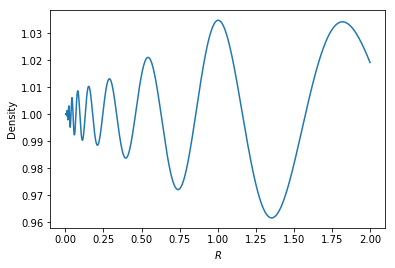

In [249]:
R = np.linspace(0, 2, 1000)
sp_dens = np.zeros(R.size)
mp_dens = np.zeros(R.size)

for k in range(len(R)):
    sp_dens[k] = evaluateDensities(pot, R[k], 0, 0)
    mp_dens[k] = evaluateDensities(mp, R[k], 0)
        
plt.plot(R, sp_dens / mp_dens)    
plt.xlabel("$R$")
plt.ylabel("Density")
plt.show()

In [ ]:
def plot_rel_dens()

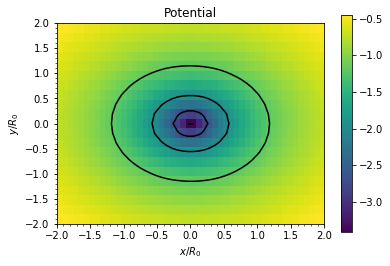

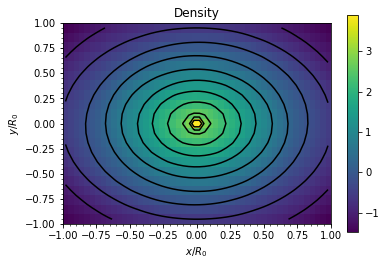

In [251]:
from galpy.potential import plotPotentials, plotDensities
pot_plt = plotPotentials(pot, xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=5, nrs=50)
pot_plt.colorbar = plt.colorbar(pot_plt)
pot_plt.set_cmap('viridis')
plt.title('Potential')

den_plt = plotDensities(pot, xy=True, rmin=-1, rmax=1, zmin=-1, zmax=1, ncontours=13, nrs=50, log=True)
den_plt.colorbar = plt.colorbar(den_plt)
den_plt.set_cmap('viridis')
plt.title('Density')
plt.show()

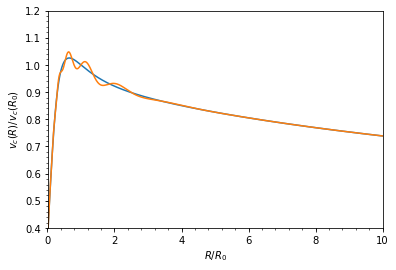

In [188]:
from galpy.potential import plotRotcurve
plotRotcurve(mp, Rrange=[0.01,10.], grid=1001, yrange=[0.4,1.2])
plotRotcurve(pot, Rrange=[0.01,10.], grid=1001, phi=0, yrange=[0.4,1.2], overplot=True)

plt.show()

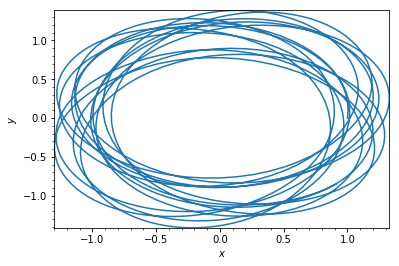

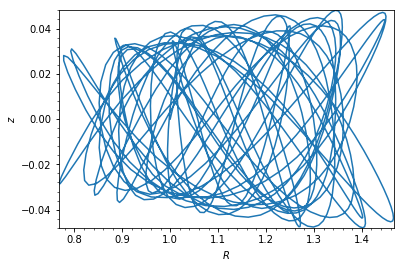

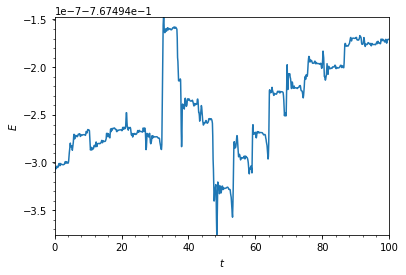

In [229]:
orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
ts = np.linspace(0,100,1000)
orb.integrate(ts, pot, method='odeint')
orb.plot(d1='x', d2='y')
orb.plot()
orb.plotE()
plt.show()

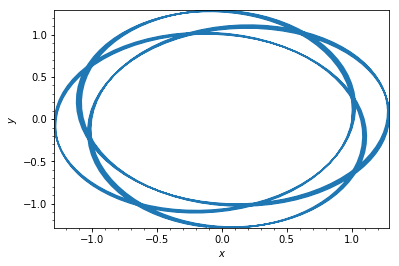

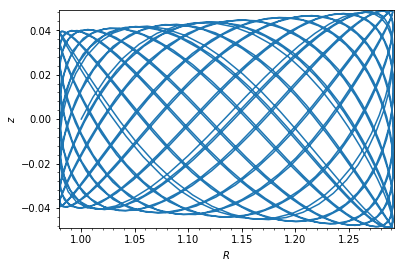

In [179]:
orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
ts = np.linspace(0,100,1000)
orb.integrate(ts, mp, method='odeint')
orb.plot(d1='x', d2='y')
orb.plot()
plt.show()